In [2]:
import requests
import json
import pandas as pd

In [ ]:
# The ENDPOINT should be like: https://mvad-sample.cognitiveservices.azure.com/anomalydetector/v1.1
ENDPOINT = "{Your endpoint of Anomaly Detector resource}anomalydetector/v1.1"
HEADERS = {
    "Ocp-Apim-Subscription-Key": "{Your key of Anomaly Detector resource.}"
}
# The data source url should be like: https://mvaddataset.blob.core.windows.net/sample-multitable/sample_data_5_300
DATA_SOURCE_URL= "{The Blob URL for your data.}"
# If your data is one CSV file, please set the dataSchema as `OneTable`, if your data is multiple CSV files in a folder, please set the dataSchema as `MultiTable`.
DATA_SCHEMA="{Please specify your dataSchema as 'MultiTable' or 'OneTable'.}"

In [3]:
ENDPOINT = "https://mvad-ga-1028.cognitiveservices.azure.com/anomalydetector/v1.1"
HEADERS = {
    "Ocp-Apim-Subscription-Key": "XXXXx"
}
DATA_SOURCE_URL= "https://mvaddata1.blob.core.windows.net/mvad/sample_data_5_3000.csv"
DATA_SCHEMA="OneTable"

In [4]:
API_MODEL = "{endpoint}/multivariate/models"
API_MODEL_STATUS = "{endpoint}/multivariate/models/{model_id}"
API_MODEL_BATCH_INFERENCE = "{endpoint}/multivariate/models/{model_id}:detect-batch"
API_MODEL_LAST_INFERENCE = "{endpoint}/multivariate/models/{model_id}:detect-last"
API_RESULTS = "{endpoint}/multivariate/detect-batch/{result_id}"
API_DELETE = "{endpoint}/multivariate/models/{model_id}"

# Train a model

In [11]:
SLIDING_WINDOW = 200
data = {
    "slidingWindow": SLIDING_WINDOW,
    "alignPolicy": {
        "alignMode": "Outer",
        "fillNAMethod": "Linear", 
        "paddingValue": 0
    },
    "dataSource": DATA_SOURCE_URL,
    "dataSchema": DATA_SCHEMA,
    "startTime": "2021-01-01T00:00:00Z", 
    "endTime": "2021-01-02T09:19:00Z", 
    "displayName": "SampleRequest"
}

res = requests.post(API_MODEL.format(endpoint=ENDPOINT), data=json.dumps(data), headers=HEADERS)
assert res.status_code == 201, f"Error occurred. Error message: {res.content}"
print(res.content)
location = res.headers['Location']
model_id = location[location.rindex('/')+1:]
print(f"ModelId is {model_id}")

b'{"modelId": "009e19a2-58d1-11ed-996d-b6a56b4ecf8f", "createdTime": "2022-10-31T04:03:40Z", "lastUpdatedTime": "2022-10-31T04:03:40Z", "modelInfo": {"dataSource": "https://mvaddata1.blob.core.windows.net/mvad/sample_data_5_3000.csv", "dataSchema": "OneTable", "startTime": "2021-01-01T00:00:00Z", "endTime": "2021-01-02T09:19:00Z", "displayName": "SampleRequest", "slidingWindow": 200, "alignPolicy": {"alignMode": "Outer", "fillNAMethod": "Linear", "paddingValue": 0.0}, "status": "CREATED", "errors": [], "diagnosticsInfo": {"modelState": {"epochIds": [], "trainLosses": [], "validationLosses": [], "latenciesInSeconds": []}, "variableStates": []}}}\n'
ModelId is 009e19a2-58d1-11ed-996d-b6a56b4ecf8f


# Get model status

In [18]:
res = requests.get(API_MODEL_STATUS.format(endpoint=ENDPOINT, model_id = model_id), headers=HEADERS)
assert res.status_code == 200, f"Error occurred. Error message: {res.content}"
res_content = json.loads(res.content)
print(json.dumps(res_content))
print(f"Model is {res_content['modelInfo']['status']}")

{"modelId": "009e19a2-58d1-11ed-996d-b6a56b4ecf8f", "createdTime": "2022-10-31T04:03:40Z", "lastUpdatedTime": "2022-10-31T04:04:44Z", "modelInfo": {"dataSource": "https://mvaddata1.blob.core.windows.net/mvad/sample_data_5_3000.csv", "dataSchema": "OneTable", "startTime": "2021-01-01T00:00:00Z", "endTime": "2021-01-02T09:19:00Z", "displayName": "SampleRequest", "slidingWindow": 200, "alignPolicy": {"alignMode": "Outer", "fillNAMethod": "Linear", "paddingValue": 0.0}, "status": "READY", "errors": [], "diagnosticsInfo": {"modelState": {"epochIds": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], "trainLosses": [0.42961672395467754, 0.3063986077904701, 0.2618359178304672, 0.24399512410163882, 0.23450686335563659, 0.22792436480522155, 0.22304908633232118, 0.22581463456153872, 0.22068361043930054, 0.4019956812262535], "validationLosses": [0.3416653823852539, 0.2977622032165527, 0.2817555904388428, 0.2737536907196045, 0.26115262031555175, 0.256743335723877, 0.25375119209289554, 0.2539134788513183, 

# Asynchronous Inference

## Trigger asynchronous inference

In [19]:
data = {
    "dataSource": DATA_SOURCE_URL,
    "topContributorCount": 10,
    "startTime": "2021-01-02T12:00:00Z", 
    "endTime": "2021-01-03T00:00:00Z"
}

res = requests.post(API_MODEL_BATCH_INFERENCE.format(endpoint=ENDPOINT, model_id=model_id), 
                    data=json.dumps(data), headers=HEADERS)

print(res.headers)
print(res.content)
assert res.status_code == 202, f"Error occurred. Error message: {res.content}"
result_id = res.headers["operation-id"]
print(f"Result id is {result_id}")

{'Content-Length': '337', 'Content-Type': 'application/json', 'operation-location': 'https://mvad-ga-1028.cognitiveservices.azure.com:443/anomalydetector/v1.1/multivariate/detect-batch/', 'operation-id': '9bd007f0-58d1-11ed-afa9-b6a56b4ecf8f', 'x-envoy-upstream-service-time': '241', 'apim-request-id': '6bdd13f0-a737-434a-b871-c38f0cfca2fe', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'x-content-type-options': 'nosniff', 'x-ms-region': 'UK South', 'Date': 'Mon, 31 Oct 2022 04:07:59 GMT'}
b'{"resultId": "9bd007f0-58d1-11ed-afa9-b6a56b4ecf8f", "summary": {"status": "CREATED", "errors": [], "variableStates": [], "setupInfo": {"dataSource": "https://mvaddata1.blob.core.windows.net/mvad/sample_data_5_3000.csv", "topContributorCount": 10, "startTime": "2021-01-02T12:00:00Z", "endTime": "2021-01-03T00:00:00Z"}}, "results": []}\n'
Result id is 9bd007f0-58d1-11ed-afa9-b6a56b4ecf8f


## Get batch inference results

In [20]:
res = requests.get(API_RESULTS.format(endpoint=ENDPOINT, result_id=result_id), headers=HEADERS)
assert res.status_code == 200, f"Error occurred. Error message: {res.content}"
batch_results=json.loads(res.content)
batch_results

{'resultId': '9bd007f0-58d1-11ed-afa9-b6a56b4ecf8f',
 'summary': {'status': 'READY',
  'errors': [],
  'variableStates': [{'variable': 'series_0',
    'filledNARatio': 0.0,
    'effectiveCount': 721,
    'firstTimestamp': '2021-01-02T12:00:00Z',
    'lastTimestamp': '2021-01-03T00:00:00Z'},
   {'variable': 'series_1',
    'filledNARatio': 0.0,
    'effectiveCount': 721,
    'firstTimestamp': '2021-01-02T12:00:00Z',
    'lastTimestamp': '2021-01-03T00:00:00Z'},
   {'variable': 'series_2',
    'filledNARatio': 0.0,
    'effectiveCount': 721,
    'firstTimestamp': '2021-01-02T12:00:00Z',
    'lastTimestamp': '2021-01-03T00:00:00Z'},
   {'variable': 'series_3',
    'filledNARatio': 0.0,
    'effectiveCount': 721,
    'firstTimestamp': '2021-01-02T12:00:00Z',
    'lastTimestamp': '2021-01-03T00:00:00Z'},
   {'variable': 'series_4',
    'filledNARatio': 0.0,
    'effectiveCount': 721,
    'firstTimestamp': '2021-01-02T12:00:00Z',
    'lastTimestamp': '2021-01-03T00:00:00Z'}],
  'setupInfo': 

In [156]:
batch_results_df=pd.json_normalize(batch_results,record_path=['results'],errors='ignore')
batch_results_df

,timestamp,errors,value.isAnomaly,value.severity,value.score,value.interpretation
0,2021-01-02T12:00:00Z,[],False,0.000000,0.337481,[]
1,2021-01-02T12:01:00Z,[],False,0.000000,0.238778,[]
2,2021-01-02T12:02:00Z,[],False,0.000000,0.163547,[]
3,2021-01-02T12:03:00Z,[],False,0.000000,0.237346,[]
4,2021-01-02T12:04:00Z,[],False,0.000000,0.245659,[]
...,...,...,...,...,...,...
716,2021-01-02T23:56:00Z,[],False,0.000000,0.249437,[]
717,2021-01-02T23:57:00Z,[],False,0.000000,0.342212,[]
718,2021-01-02T23:58:00Z,[],True,0.299054,0.513859,"[{'variable': 'series_1', 'contributionScore':..."
719,2021-01-02T23:59:00Z,[],False,0.000000,0.448912,[]


In [141]:
t1=pd.json_normalize(batch_results,record_path=['value.interpretation'])
final=pd.concat([t1,batch_results_df],axis=1)

KeyError: 'value.interpretation'

In [135]:
ts=batch_results_df.iloc[718]
output=ts['value.interpretation']


[{'variable': 'series_3',
  'contributionScore': 0.11040566548941862,
  'correlationChanges': {'changedVariables': ['series_4']}},
 {'variable': 'series_0',
  'contributionScore': 0.11903966847566537,
  'correlationChanges': {'changedVariables': ['series_4']}},
 {'variable': 'series_4',
  'contributionScore': 0.14679930089848622,
  'correlationChanges': {'changedVariables': ['series_4']}},
 {'variable': 'series_2',
  'contributionScore': 0.18373741295043378,
  'correlationChanges': {'changedVariables': ['series_4']}},
 {'variable': 'series_1',
  'contributionScore': 0.440017952185996,
  'correlationChanges': {'changedVariables': ['series_4']}}]

In [136]:
def parse(x):
    if type(x) is list:
        return dict([item[::-1] for item in x])
    else:
        return {'series_0': 0, 'series_1': 0, 'series_2': 0,'series_3': 0,'series_4': 0, }

In [137]:
batch_results_df['value.interpretation'] = batch_results_df['value.interpretation'].apply(parse)

TypeError: unhashable type: 'slice'

In [ ]:
rdf = pd.concat([rdf.drop(['contributors'], axis=1), pd.json_normalize(rdf['contributors'])], axis=1)
rdf

# Streaming Inference

In [117]:
import json

with open("5_3000.json", "r") as f:
    sample_input = json.load(f)

url = API_MODEL_LAST_INFERENCE.format(endpoint=ENDPOINT,model_id=model_id)
payload = sample_input

res = requests.post(url, headers=HEADERS, data=json.dumps(payload))
# print(res.content)
streaming_results=json.loads(res.content)
streaming_results

{'variableStates': [{'variable': 'series_0',
   'filledNARatio': 0.0,
   'effectiveCount': 1,
   'firstTimestamp': '2021-01-03T01:59:00Z',
   'lastTimestamp': '2021-01-03T01:59:00Z'},
  {'variable': 'series_1',
   'filledNARatio': 0.0,
   'effectiveCount': 1,
   'firstTimestamp': '2021-01-03T01:59:00Z',
   'lastTimestamp': '2021-01-03T01:59:00Z'},
  {'variable': 'series_2',
   'filledNARatio': 0.0,
   'effectiveCount': 1,
   'firstTimestamp': '2021-01-03T01:59:00Z',
   'lastTimestamp': '2021-01-03T01:59:00Z'},
  {'variable': 'series_3',
   'filledNARatio': 0.0,
   'effectiveCount': 1,
   'firstTimestamp': '2021-01-03T01:59:00Z',
   'lastTimestamp': '2021-01-03T01:59:00Z'},
  {'variable': 'series_4',
   'filledNARatio': 0.0,
   'effectiveCount': 1,
   'firstTimestamp': '2021-01-03T01:59:00Z',
   'lastTimestamp': '2021-01-03T01:59:00Z'}],
 'results': [{'timestamp': '2021-01-03T01:59:00Z',
   'value': {'isAnomaly': False,
    'severity': 0.0,
    'score': 0.2724536955356598,
    'interpre

In [118]:
streaming_results_df=pd.json_normalize(streaming_results,record_path=['results'])
streaming_results_df

,timestamp,errors,value.isAnomaly,value.severity,value.score,value.interpretation
0,2021-01-03T01:59:00Z,[],False,0.0,0.272454,[]


# List models

In [119]:
res = requests.get(API_MODEL.format(endpoint=ENDPOINT), headers=HEADERS)
assert res.status_code == 200, f"Error occurred. Error message: {res.content}"
# print(res.content)

model_list = json.loads(res.content)
model_list

{'models': [{'modelId': 'e4023bd6-56c1-11ed-8c9b-3a0e6104b5f6',
   'createdTime': '2022-10-28T13:10:27Z',
   'lastUpdatedTime': '2022-10-28T13:11:29Z',
   'modelInfo': {'dataSource': 'https://mvaddata1.blob.core.windows.net/mvad/sample_data_5_3000.csv',
    'dataSchema': 'OneTable',
    'startTime': '2021-01-01T00:00:00Z',
    'endTime': '2021-01-02T09:19:00Z',
    'displayName': 'SampleRequest',
    'slidingWindow': 200,
    'alignPolicy': {'alignMode': 'Outer',
     'fillNAMethod': 'Linear',
     'paddingValue': 0.0},
    'status': 'READY',
    'errors': [],
    'diagnosticsInfo': {'modelState': {'epochIds': [10,
       20,
       30,
       40,
       50,
       60,
       70,
       80,
       90,
       100],
      'trainLosses': [0.42961672395467754,
       0.3063986077904701,
       0.2618359178304672,
       0.24399512410163882,
       0.23450686335563659,
       0.22792436480522155,
       0.22304908633232118,
       0.22581463456153872,
       0.22068361043930054,
       0.40

In [120]:
model_list=pd.json_normalize(model_list,record_path=['models'],meta=['currentCount','maxCount'])
model_list= df[['modelId','modelInfo.displayName','modelInfo.status','modelInfo.dataSource','currentCount','maxCount']]
model_list

,modelId,modelInfo.displayName,modelInfo.status,modelInfo.dataSource,currentCount,maxCount
0,1c2222de-56a8-11ed-afed-3a0e6104b5f6,SampleRequest,READY,https://mvaddata1.blob.core.windows.net/mvad/s...,7,1000
1,5d0f1b78-56a6-11ed-afed-3a0e6104b5f6,SampleRequest,READY,https://mvaddata1.blob.core.windows.net/mvad/s...,7,1000
2,3d22b854-5694-11ed-abc8-b679c3d429e0,SampleRequest,READY,https://mvaddata1.blob.core.windows.net/mvad/s...,7,1000
3,2828ad1e-5694-11ed-9449-9e7261b759c5,SampleRequest,FAILED,https://mvaddata1.blob.core.windows.net/mvad/s...,7,1000
4,dd1dc7d2-5693-11ed-a773-86cdb0bfc0fd,SampleRequest,FAILED,https://mvaddata1.blob.core.windows.net/mvad/s...,7,1000
5,b2805f8a-5693-11ed-a773-86cdb0bfc0fd,SampleRequest,FAILED,https://mvaddata1.blob.core.windows.net/mvad/s...,7,1000
6,88f1780c-5693-11ed-83aa-b679c3d429e0,SampleRequest,FAILED,https://mvaddata1.blob.core.windows.net/mvad/s...,7,1000


# Delete model

In [ ]:
res = requests.delete(API_DELETE.format(endpoint=ENDPOINT, model_id=model_id), headers=HEADERS)
assert res.status_code == 204, f"Error occurred. Error message: {res.content}"
print(res.content)

# Visualization

In [28]:
data=pd.read_csv('sample_data_5_3000.csv')
data

,timestamp,series_0,series_1,series_2,series_3,series_4
0,2021-01-01T00:00:00Z,-0.029423,-0.473649,-0.192245,1.346951,1.289716
1,2021-01-01T00:01:00Z,1.007787,-1.052367,0.262377,-0.143764,0.535112
2,2021-01-01T00:02:00Z,-0.748066,-0.566473,-0.072228,2.098236,-0.680700
3,2021-01-01T00:03:00Z,0.969546,-0.376076,0.190655,-0.481221,0.512042
4,2021-01-01T00:04:00Z,-1.437885,0.882075,-1.007225,-1.061802,0.575166
...,...,...,...,...,...,...
2995,2021-01-03T01:55:00Z,0.572729,-1.318392,0.492164,-0.326105,-0.494300
2996,2021-01-03T01:56:00Z,1.311772,0.408282,0.278034,0.505975,0.494727
2997,2021-01-03T01:57:00Z,1.079186,0.528480,0.066745,-1.186922,0.836286
2998,2021-01-03T01:58:00Z,0.138812,0.657773,-0.456893,0.339240,-0.647699


In [60]:
df_merge=pd.merge(batch_results_df,data, on="timestamp")
df_merge

,timestamp,errors,value.isAnomaly,value.severity,value.score,value.interpretation,series_0,series_1,series_2,series_3,series_4
0,2021-01-02T12:00:00Z,[],False,0.000000,0.337481,[],1.406643,0.038892,-0.900322,-0.496920,1.835452
1,2021-01-02T12:01:00Z,[],False,0.000000,0.238778,[],0.498293,-1.203895,-0.015028,0.639817,1.336381
2,2021-01-02T12:02:00Z,[],False,0.000000,0.163547,[],0.482624,0.117251,-0.346558,0.380744,1.216002
3,2021-01-02T12:03:00Z,[],False,0.000000,0.237346,[],0.135886,0.175647,0.529109,-1.525938,-0.921328
4,2021-01-02T12:04:00Z,[],False,0.000000,0.245659,[],-1.056639,-1.452493,-0.204444,-0.408568,-0.532862
...,...,...,...,...,...,...,...,...,...,...,...
716,2021-01-02T23:56:00Z,[],False,0.000000,0.249437,[],-0.496276,-0.327522,-0.982608,-1.152828,0.732866
717,2021-01-02T23:57:00Z,[],False,0.000000,0.342212,[],0.833020,0.285757,-1.691492,-1.481046,0.214137
718,2021-01-02T23:58:00Z,[],True,0.299054,0.513859,"[{'variable': 'series_1', 'contributionScore':...",0.864732,2.680365,1.244429,0.827081,-1.171265
719,2021-01-02T23:59:00Z,[],False,0.000000,0.448912,[],-0.742697,-1.620215,-1.778069,-1.627223,0.172657


In [44]:
df22 = df.iloc[718]
df22

timestamp                                            2021-01-02T23:58:00Z
errors                                                                 []
value.isAnomaly                                                      True
value.severity                                                   0.299054
value.score                                                      0.513859
value.interpretation    [{'variable': 'series_1', 'contributionScore':...
series_0                                                         0.864732
series_1                                                         2.680365
series_2                                                         1.244429
series_3                                                         0.827081
series_4                                                        -1.171265
Name: 718, dtype: object

In [50]:
df22['value.interpretation']

[{'variable': 'series_1',
  'contributionScore': 0.440017952185996,
  'correlationChanges': {'changedVariables': ['series_4']}},
 {'variable': 'series_2',
  'contributionScore': 0.18373741295043378,
  'correlationChanges': {'changedVariables': ['series_4']}},
 {'variable': 'series_4',
  'contributionScore': 0.14679930089848622,
  'correlationChanges': {'changedVariables': ['series_4']}},
 {'variable': 'series_0',
  'contributionScore': 0.11903966847566537,
  'correlationChanges': {'changedVariables': ['series_4']}},
 {'variable': 'series_3',
  'contributionScore': 0.11040566548941862,
  'correlationChanges': {'changedVariables': ['series_4']}}]

<AxesSubplot:xlabel='timestamp', ylabel='value.score'>

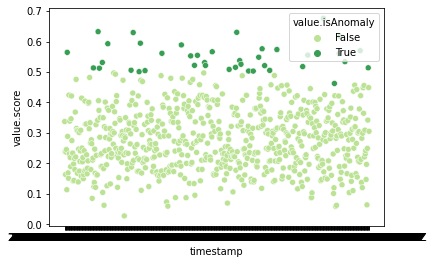

In [150]:
sns.scatterplot(x="timestamp",y="value.score",data=df,hue="value.isAnomaly",palette="YlGn")

In [79]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

C:\Users\jingruhan\AppData\Local\Temp\ipykernel_23704\1529234354.py:22: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



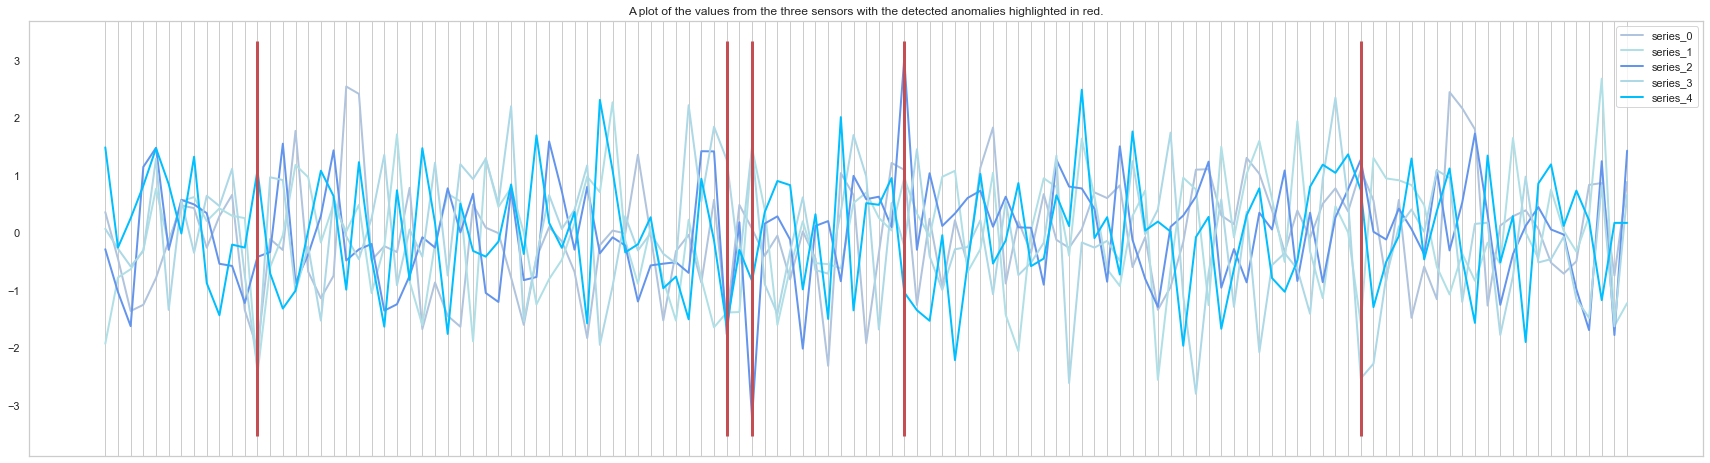

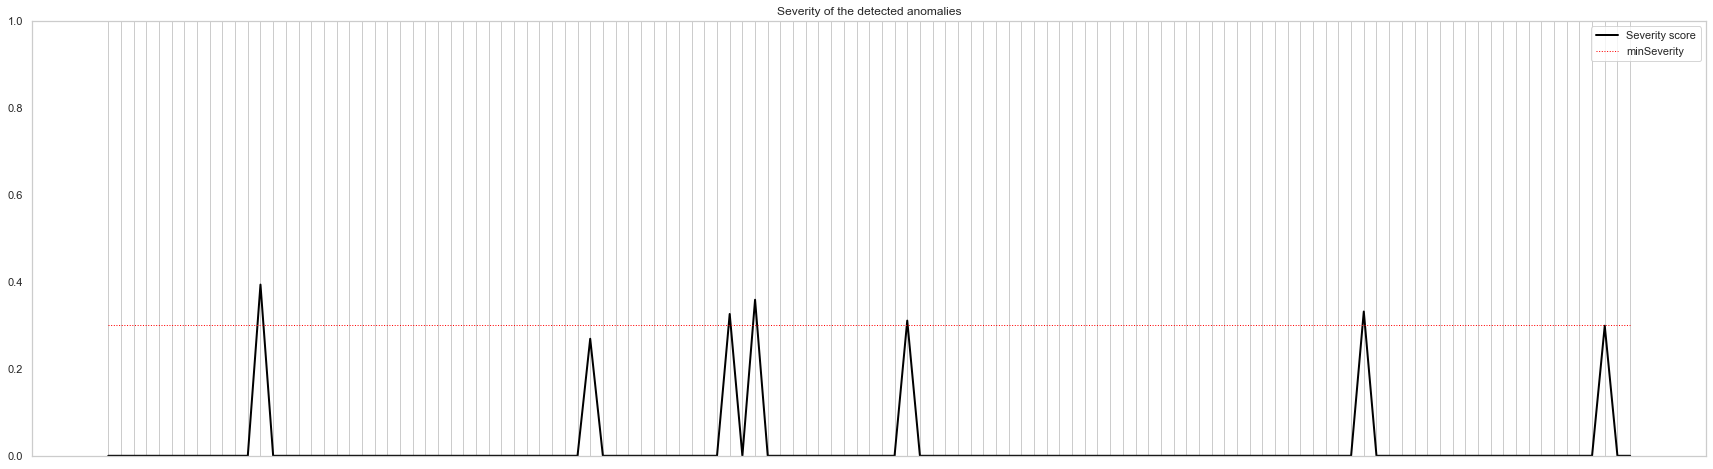

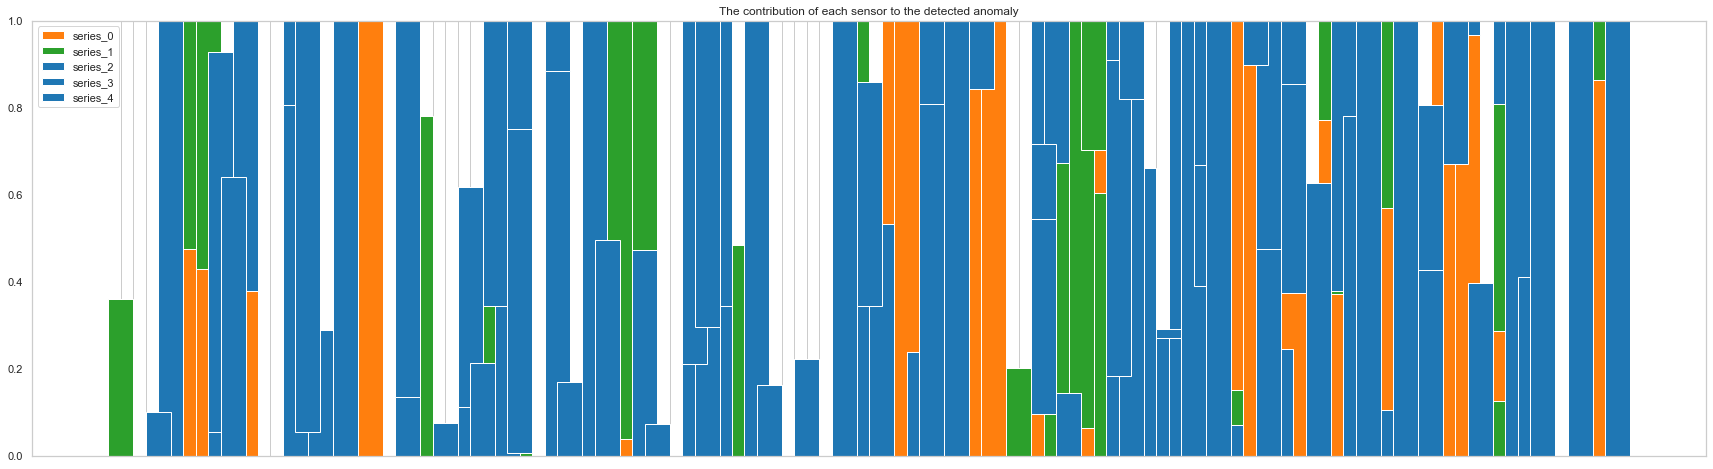

In [107]:
from turtle import width


minSeverity = 0.3

df = df_merge.iloc[600:]

####### Main Figure #######
plt.figure(figsize=(30,8))
plt.plot(df['timestamp'],df['series_0'], color='lightsteelblue', linestyle='solid', linewidth=2, label='series_0')
plt.plot(df['timestamp'],df['series_1'], color='powderblue', linestyle='solid', linewidth=2, label='series_1')
plt.plot(df['timestamp'],df['series_2'], color='cornflowerblue', linestyle='solid', linewidth=2, label='series_2')
plt.plot(df['timestamp'],df['series_3'], color='lightblue', linestyle='solid', linewidth=2, label='series_3')
plt.plot(df['timestamp'],df['series_4'], color='deepskyblue', linestyle='solid', linewidth=2, label='series_4')

plt.grid(axis='y')
plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
plt.legend()

anoms = list(df["value.severity"] >= minSeverity)
_, _, ymin, ymax = plt.axis()
plt.vlines(np.where(anoms), ymin=ymin , ymax=ymax , color='r', alpha=1,linewidth=3)

plt.legend()
plt.title('A plot of the values from the three sensors with the detected anomalies highlighted in red.')
plt.show()


####### Severity Figure #######
plt.figure(figsize=(30,8))
plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
plt.plot(df['timestamp'],df['value.severity'], color='black', linestyle='solid', linewidth=2, label='Severity score')
plt.plot(df['timestamp'],[minSeverity]*len(df['value.severity']), color='red', linestyle='dotted', linewidth=1, label='minSeverity')
plt.grid(axis='y')
plt.legend()
plt.ylim((0,1))
plt.title("Severity of the detected anomalies")
plt.show()


####### Contributors Figure #######
plt.figure(figsize=(30,8))
plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
plt.bar(df['timestamp'],df['series_0'], width=2, color='tab:orange', label='series_0')
plt.bar(df['timestamp'],df['series_1'], width=2, color='tab:green', label='series_1', bottom=df['series_0'])
plt.bar(df['timestamp'],df['series_2'], width=2, color='tab:blue', label='series_2', bottom=df['series_0']+df['series_1'])
plt.bar(df['timestamp'],df['series_3'], width=2, color='tab:blue', label='series_3', bottom=df['series_0']+df['series_1']+df['series_2'])
plt.bar(df['timestamp'],df['series_4'], width=2, color='tab:blue', label='series_4', bottom=df['series_0']+df['series_1']+df['series_2']+df['series_3'])
plt.grid(axis='y')
plt.legend()
plt.ylim([0,1])
plt.title("The contribution of each sensor to the detected anomaly")
plt.show()